## "In the name of God"

### <font color = '	#1E90FF'>**Dry Beans Classification**</font>

Classification of dry beans based on the physical characteristics is important in understanding the seed quality. The seed quality reflects the market values of the beans and therefore it becomes essential for farmers to know for planting. Since classifying these beans manually can be time-consuming and difficult especially for a large sample of data, the use of statistical models become necessary and make the classification simpler. A model that can predict and classify different types of dry beans with a good predictive accuracy can be used for efficient and accurate classification and prediction. In this notebook, I will apply various classification methods to the dataset of the dry beans and determine which method performed the best based on the misclassification error, which measures of the predictive accuracy of a model.

### <font color = '	#1E90FF'>**Data Fields**</font>

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

### <font color = '	#1E90FF'>**Import Libraries**</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix




### <font color = '	#1E90FF'>**Reading The Dataset**</font>

In [8]:
df = pd.read_excel("Dry_Bean_Dataset.xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


- There ara 13611 rows and a total of 16 features.

In [9]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

- There are 7 unique target classes.

### <font color = '	#1E90FF'>**Data Summary**</font>

In [10]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


- The variables, Area and Convex Area, had the largest range for all four datasets. There are large differences in the range of variables, the variables with larger ranges can dominate over those with small ranges which may lead to biased results, therefore it is necessary to transform/scale these variables before fitting distance-based models.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

- We find that we have no null data. But if we had, we should have considered it.

### <font color = '	#1E90FF'>**Checking For Duplicates**</font>

In [12]:
df.duplicated(subset=None, keep= 'last').sum()

68

In [13]:
df = df.drop_duplicates()

In [14]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


- In this section, we checked the presence of duplicate rows and found that there are 68 duplicate data. So we deleted them and finally 13543 data remained.

### <font color = '	#1E90FF'>**EDA**</font>

<font color = 'cyan'>**1. Count and distribution of all beans categories:**</font>

In [15]:
print(df['Class'].value_counts())

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


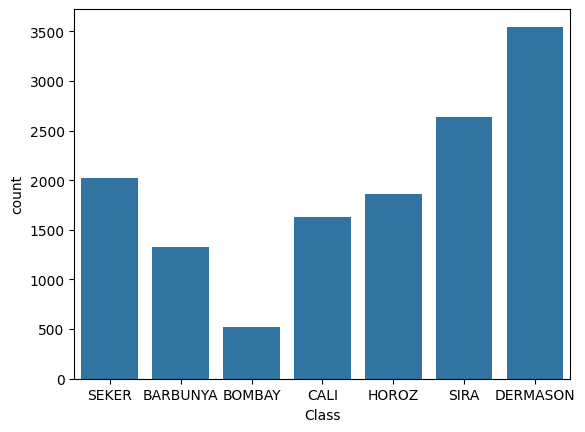

In [16]:
fig_1 = sns.countplot(x='Class', data=df)

- By drawing the categories of beans, we realize that there is an imbalance between these data.

<font color = 'cyan'>**2- Distribution of numerical features:**</font>

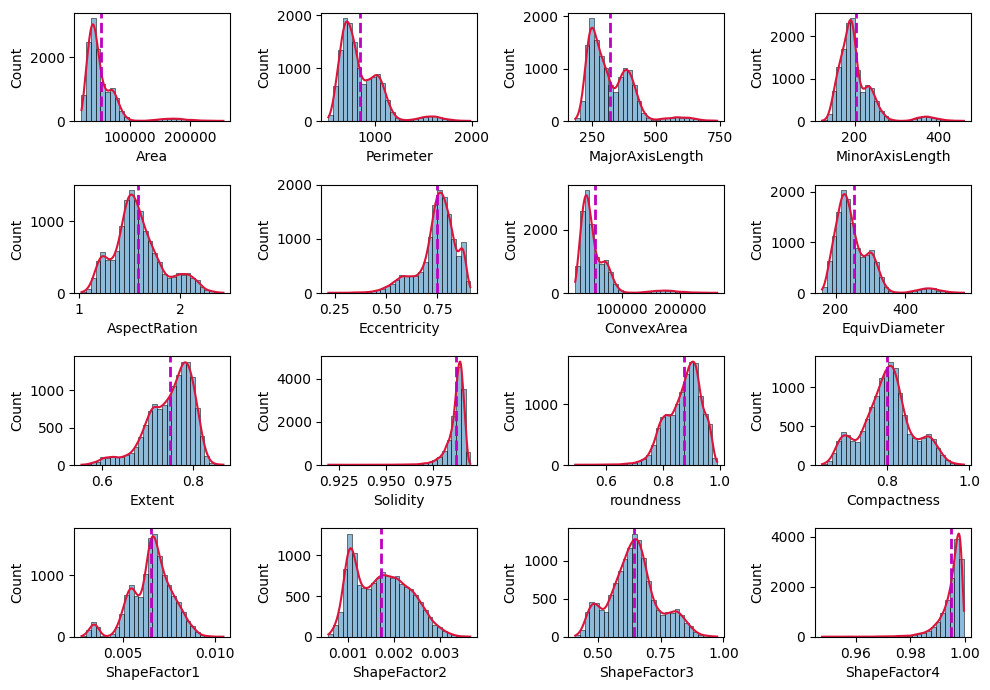

In [17]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(10, 7))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

-  Some distributions have **long tails** (E.g => solidity, covex area, shapefactor4 , area,..) and most are **bi-modal** (E.g=> roundness,extent,majoraxislendht,..) which means that some bean classes should be quite distinct from others. 
- In the other hand, the variables Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter are positively skewed whereas Eccentricity, Extent, Solidity roundness, and ShapeFactor4 are negatively skewed. AspectRation, Compactness, ShapeFactor1, ShapeFactor3 are slightly skewed but they look very close to the normal distribution.

<font color = 'cyan'>**3- Pearson linear correlation:**</font>

<Axes: >

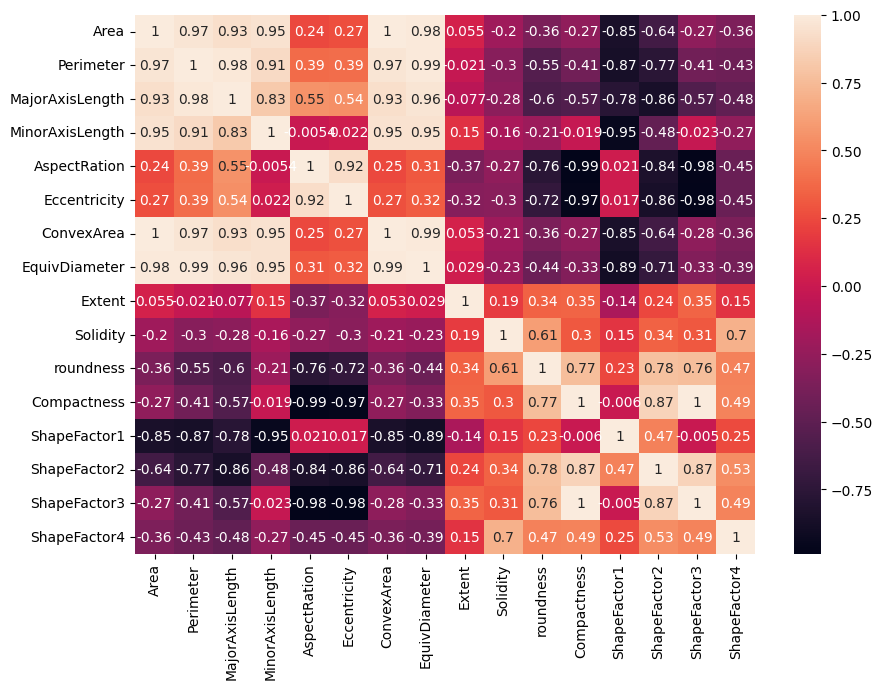

In [18]:
X = df.drop('Class',axis=1)
y = df['Class']

plt.figure(figsize=(10,7))
sns.heatmap(X.corr(method='pearson'),annot=True)



- There is a lot of correlation between some features.

### <font color = '	#1E90FF'>**Pre-Processing**</font>

<font color = 'cyan'>**1.Dealing with outliers: IQR method**</font>

- Here we look at which data points are outside the whiskers. This method has the advantage, that it uses robust parameters for the calculation.

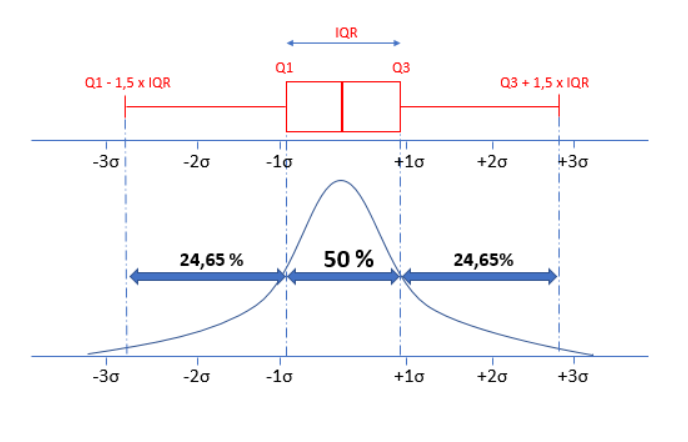

In [19]:
all_ind = []
    
for col in X.columns:
    x = X[col]
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)    
        
    all_ind.extend(np.argwhere((x > upper_bound) | (x < lower_bound)).tolist())
        
idx = np.unique(np.array(all_ind))
idx = [index for index in idx if index in X.index]
X = X.drop(index=idx)
y = y.drop(index=idx)

In [20]:
print(X.shape[0])
print(y.shape[0])

10566
10566


- Since outliers can distort our forecast, we need to check and remove them. After applying these changes, our data will be reduced to 10566 data.

<font color = 'cyan'>**2.Feature scaling: Robust Scaler**</font>

- When our data is not balanced like now, we can scalar the data in two ways : Min-Max and Robust Scaler. We used the Robust Scaler method here.

- Therefore it follows the formula:
$$ X_{scaled} = \frac{X - Q_1(X)}{Q_3(X) - Q_1(X)} $$

In [22]:
col_names = df.columns[0:16]
features = df[col_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.644834,-0.670296,-0.715975,-0.449778,-1.290625,-2.265848,-0.638728,-0.744342,0.059010,0.130965,0.891365,1.569916,0.499675,1.426397,1.685051,0.558656
1,-0.631327,-0.569071,-0.778083,-0.235902,-1.655981,-3.726024,-0.620937,-0.726831,0.353306,-0.760738,0.042379,2.138444,0.243480,1.836840,2.349486,0.488284
2,-0.605590,-0.619846,-0.678255,-0.400395,-1.244803,-2.129219,-0.600771,-0.693747,0.267349,0.292878,0.769654,1.505579,0.436074,1.328250,1.611677,0.640702
3,-0.580569,-0.540354,-0.696662,-0.241171,-1.450013,-2.807448,-0.560517,-0.661931,0.334413,-2.670643,0.244513,1.780060,0.271121,1.492718,1.927287,-0.526105
4,-0.575310,-0.634361,-0.767346,-0.053479,-1.789770,-4.552297,-0.572469,-0.655286,0.193719,0.600329,1.212455,2.372220,0.038979,1.936754,2.631061,0.664655


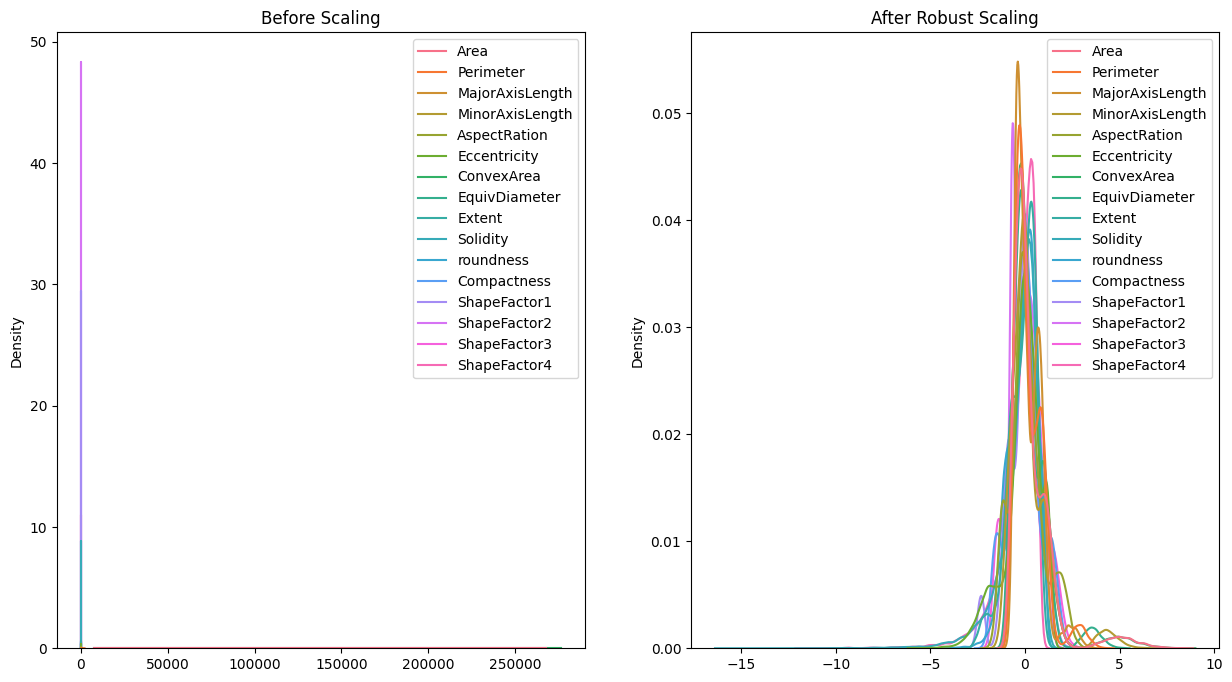

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df[col_names], ax=ax1)


ax2.set_title('After Robust Scaling')
sns.kdeplot(scaled_features[col_names], ax=ax2)

plt.show()

### <font color = '	#1E90FF'>**Modeling**</font>

- The model helps to determine which features
belongs to which class. There are many algorithms that make the
classification process. They can give different results for different data
sets.In this notebook, models were prepared by using DT, RF, SVM.

- After fitting the data in the classification report, we come across several parameters, the meaning of which is as follows :
1. Accuracy: Accuracy refers to the proportion of all sample
points for which predictions are accurate.

$$ Accuracy = (TP + TN) / (TP + FP + TN + FN) * 100 $$

2. Precision: It quantifies the proportion of true positive
cases to all Dry Bean types.

$$ Precision=TP / (TP + FN) *100 $$

3. Recall: It is the ratio of true negative cases to all Dry
Beans types.

$$ Recall=TN / (TN + FP) *100 $$

4. F1-Score: F1-score is the harmonic mean of the model's
precision and recall.

$$ F1-Score=2 * (Precision * Recall) / (Precision + Recall) $$



In [24]:
X = df.drop('Class' , axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### <font color = 'cyan'>**Decision Tree(DT):**</font>

- A decision tree (DT) belongs to the class of so called non-parametric algorithms. The term nonparametric
can be misleading. In fact, a decision tree has parameters, but their number is not constant.
During the learning phase, a decision tree tries to find the best questions partitioning the dataset in
order to reduce information impurity (the measure is the Gini index or information entropy). The great
advantage of decision trees is that they are extremely intuitive. On the other hand, a decision tree has
no limited degrees of freedom, so it is easy to overfit (if the user is not aware of that). The splits made
by a decision tree are always orthogonal (made on one feature at a time), so the decision tree is very
sensitive to data rotation.

In [28]:
pipeline_dt = Pipeline([
    ('scaler', RobustScaler()),
    ('grid_search', GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={     
                'criterion' : ['gini' , 'entropy'],
                'max_depth' : np.arange(3, 15),
                'min_samples_split' : [2, 5, 10],
                'min_samples_leaf' : [1, 2, 4]
        },
        cv=5
    ))
])

In [29]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [30]:
best_params_dt = pipeline_dt.named_steps['grid_search'].best_params_
print("Best parameters for Decision Tree:" , best_params_dt)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [31]:
y_pred_dt = pipeline_dt.predict(X_test)

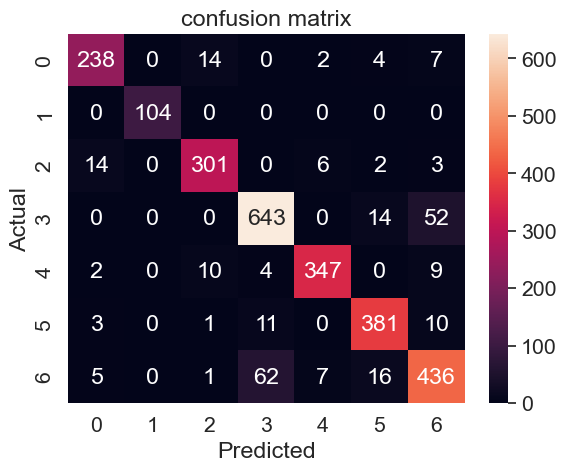

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.Figure(figsize=(10,7))
sns.set(font_scale=1.4)

sns.heatmap(conf_matrix , annot=True, fmt='g')

plt.title('confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
print(classification_report(y_test, y_pred_dt))
print(f'Accuracy:{accuracy_score(y_test, y_pred_dt)}')

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.90      0.90       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.92      0.92       326
    DERMASON       0.89      0.91      0.90       709
       HOROZ       0.96      0.93      0.95       372
       SEKER       0.91      0.94      0.93       406
        SIRA       0.84      0.83      0.84       527

    accuracy                           0.90      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.90      0.90      0.90      2709

Accuracy:0.9043927648578811


- The accuracy in this model is about 90 %. As can be seen, this model has been weaker in detecting the SIRA class than the rest of the classes, and has predicted it 84 percent. And the accuracy stated for the BOMBAY class is 100 %, which we find that this model is well fit on this model.

#### <font color = 'cyan'>**Random Forest(RF):**</font>

- The random forest idea is as follows: take many decision trees (employing some randomness, so
the trees differ) and let them vote. So the classification decision taken by a random forest is a decision
taken by the most numerous group of decision trees in a random set of trees.
Usually a random forest performs better than a single decision tree. However, a random forest is
considered a ”black-box” model being very hard to interpret.


In [35]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('grid_search', GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
              'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'class_weight': ['balanced']
            
        },
        cv=5
    ))
])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'class_weight': ['balanced'],
                                          'max_depth': [None, 10, 20, 30],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [50, 100, 200]}))])

In [37]:
best_params = pipeline.named_steps['grid_search'].best_params_
print("Best parameters:" , best_params)

Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}


In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[239,   0,  16,   0,   1,   3,   6],
       [  0, 104,   0,   0,   0,   0,   0],
       [ 11,   0, 305,   0,   5,   2,   3],
       [  0,   0,   0, 656,   0,  11,  42],
       [  1,   0,   9,   4, 352,   0,   6],
       [  5,   0,   0,   6,   0, 386,   9],
       [  4,   0,   0,  53,   8,   8, 454]], dtype=int64)

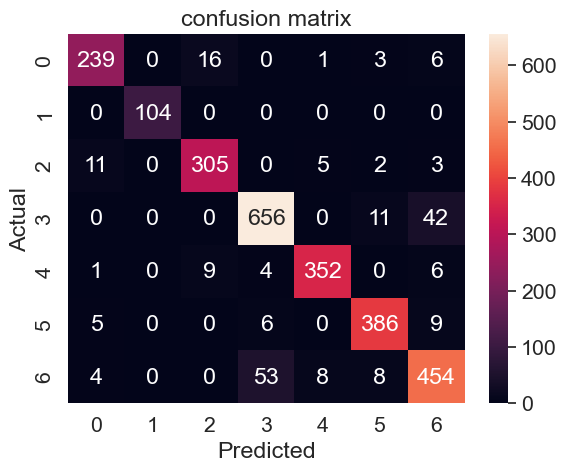

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.Figure(figsize=(10,7))
sns.set(font_scale=1.4)

sns.heatmap(conf_matrix , annot=True, fmt='g')

plt.title('confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.96      0.95      0.95       372
       SEKER       0.94      0.95      0.95       406
        SIRA       0.87      0.86      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Accuracy:0.9213732004429679


- The accuracy in this model is about 92 %. As can be seen, this model has been weaker in detecting the SIRA class than the rest of the classes, and has predicted it 87 percent,which is more than the percentage predicted in the previous model. And the accuracy stated for the BOMBAY class is 100 %, which we find that this model is well fit on this model and this percentage is the same as last model's predected.
- As it can be seen, the predicted accuracy(f1-score) for 5 of the classes is better than the accuracy obtained in the previous model, and the accuracy of two classes of BOMBAY and HOROZ is the same as the accuracy obtained in the previous model.

#### <font color = 'cyan'>**Support Vector Machine(SVM):**</font>

- Support vector machines (SVM), which can be used as regressors or classifiers, are considered a
very powerful and flexible algorithms. On the other hand. they may need a lot of computing power
. The SVM principle is to partition the classes by ”drawing a line” (or plane) in a way
that maximises the margin between classes. As straight lines (or planes) do not usually produce the
best solution.

In [58]:
pipeline_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('grid_search', GridSearchCV(SVC(),
                                 param_grid={'C':[0.1,1,10],
                                             'gamma':[0.1,1,10],
                                             'class_weight':[None,'balanced'],
                                             },
                                 cv=5
                                 ))
])


In [59]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'class_weight': [None, 'balanced'],
                                          'gamma': [0.1, 1, 10]}))])

In [64]:
best_params = pipeline_svm.named_steps['grid_search'].best_params_
print("Best parameters:" , best_params)

Best parameters: {'C': 10, 'class_weight': None, 'gamma': 0.1}


In [65]:
y_pred_svm = pipeline_svm.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.920265780730897


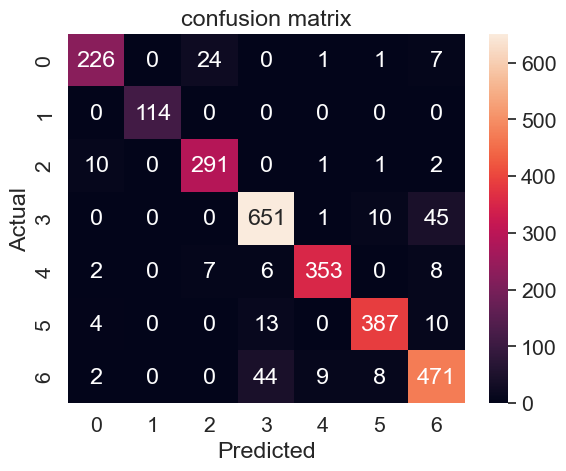

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.Figure(figsize=(10,7))
sns.set(font_scale=1.4)

sns.heatmap(conf_matrix , annot=True, fmt='g')

plt.title('confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_svm))
print(f'Accuracy:{accuracy_score(y_test, y_pred_svm)}')

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       259
      BOMBAY       1.00      1.00      1.00       114
        CALI       0.90      0.95      0.93       305
    DERMASON       0.91      0.92      0.92       707
       HOROZ       0.97      0.94      0.95       376
       SEKER       0.95      0.93      0.94       414
        SIRA       0.87      0.88      0.87       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Accuracy:0.920265780730897


- The accuracy in this model is about 92 %. As can be seen, this model has been weaker in detecting the SIRA class than the rest of the classes, and has predicted it 87 percent,which is the same as  the percentage predicted in the previous model. And the accuracy stated for the BOMBAY class is 100 %, which we find that this model is well fit on this class and this percentage is the same as last model's predected.
- In general, the performance of this model is close to random forest, and with a slight difference, its accuracy is lower than the accuracy obtained in that model.

### <font color = '	#1E90FF'>**Conclusion**</font>

- In this notebook, the results obtained from fitting three different models show that the models' accuracy and F1 score performance scores mostly overlap. This indicates that the data distribution is regular. The high success rate in all criteria shows that the models are successfully classified and it can be seen that all the classification models have the lowest sorting performance in the SIRA variety due to the low differentiation of the SIRA bean variety with the DERMASON variety. The similarity of smoothness and roundness of DERMASON and SIRA species is effective in this result. In the study, due to the large number of data in the DT model, a tree was created that did not include the characteristics of all the data. For this reason, the accuracy obtained from this model is lower than other models. By applying the RF model, which classifies data more advanced than the previous model, I was able to increase the accuracy of the model. And in general, the accuracy of the SVM model ranks second among the accuracy of these three models.